In [1]:
%matplotlib inline

In [2]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from display import to_rgb
import bioformats

In [3]:
# You can modified rcParams dictionarry to customize your setting for all your plots,
# for more info: http://matplotlib.org/users/customizing.html

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 16,8
mpl.rcParams['axes.titlesize'] = 16
#mpl.rcParams['xtick.color'] = "white"
#mpl.rcParams['ytick.color'] = "white"
mpl.rcParams['image.interpolation'] = 'nearest'

In [4]:
#mpl.rcParams.keys()

In [5]:
path = "img/1.czi"

## Loading your image using bioformats:

Use **bioformats** to open .czi file, see [here](http://localhost:8890/notebooks/load_image_bioformats/Example_usage_bioformats.ipynb) for an example on how to use it.

In [6]:
image = bioformats.BioformatsReader(path)

In [7]:
stack = image.get_stack()

In [8]:
stack.shape

(1960, 1960, 3)

In [9]:
#%whos

## The imshow() function

In Matplotlib, you can render your image using the [imshow()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) function.

Note: the subplots() function is called to add multiple plot in one figure. It simply create an array ("axes" in the following case) of shape subplots(nrows = x, ncols = y), that you can fill with plots.

In [10]:
#plt.subplots?

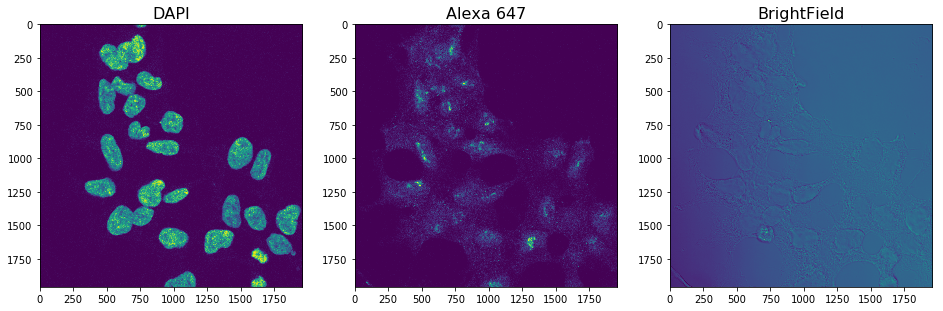

In [11]:
fig, axes = plt.subplots(1,3)
axes[0].imshow(stack[:,:,0])
axes[0].set_title('DAPI')
axes[1].imshow(stack[:,:,1])
axes[1].set_title('Alexa 647')
axes[2].imshow(stack[:,:,2])
axes[2].set_title('BrightField')

## Changing the colormap by passing the argument *cmap*

Here we plotted our 3 channels using the default colormap of matplotlib "viridis", see [here](https://matplotlib.org/users/colormaps.html) for more info about colormap.

You can change the colormap by changing the argument cmap: 

In [12]:
#For more infos on the function imshow:
#plt.imshow?

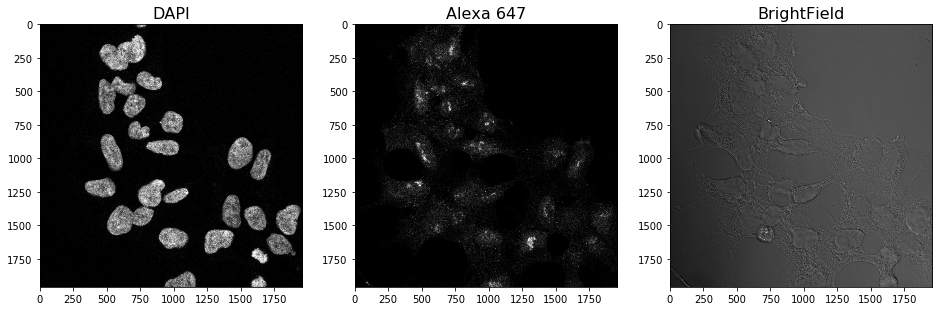

In [13]:
fig, axes = plt.subplots(1,3)
axes[0].imshow(stack[:,:,0], cmap = 'gray')
axes[0].set_title('DAPI')
axes[1].imshow(stack[:,:,1], cmap = 'gray')
axes[1].set_title('Alexa 647')
axes[2].imshow(stack[:,:,2], cmap = 'gray')
axes[2].set_title('BrightField')

With Matplotlib, it's easy to add a color scale reference by using the function colorbar():

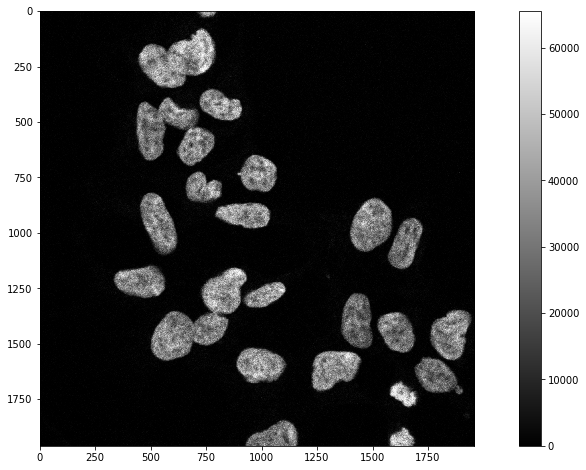

In [15]:
plt.imshow(stack[:,:,0], cmap = 'gray')
plt.colorbar()

## Histogram

To create a histogram of our image data, we use the hist() function:

> The numpy function ravel() will flatten our data image. 

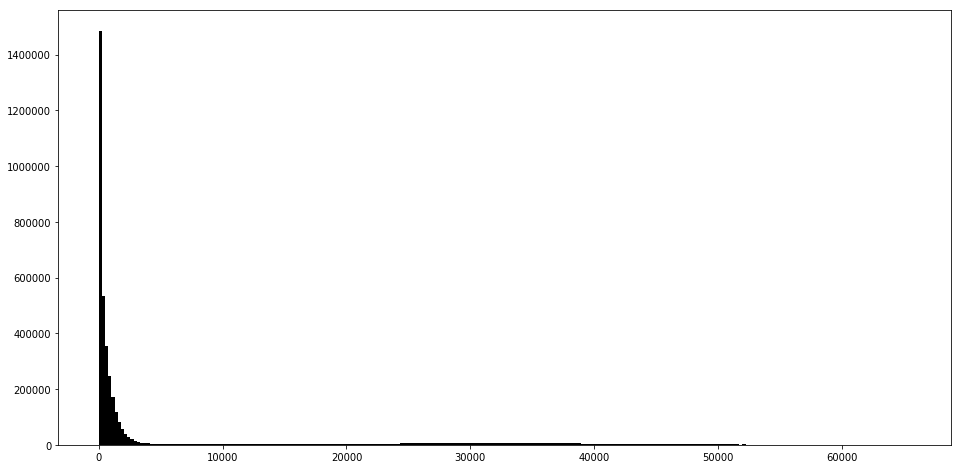

In [45]:
plt.hist(stack[...,0].ravel(), bins=256, fc = 'k')
plt.show()

### Simplification


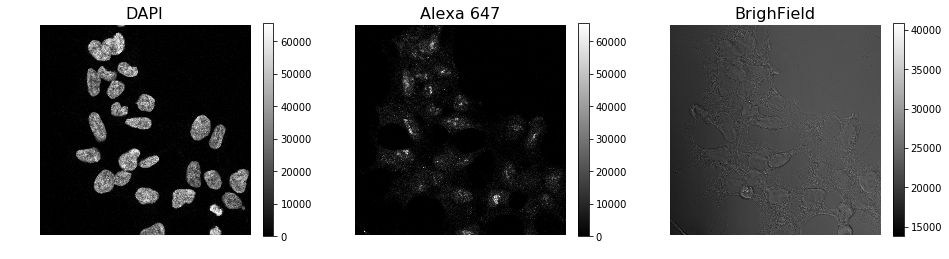

In [46]:
fig, axes = plt.subplots(1,3)
channels = ['DAPI', 'Alexa 647', 'BrighField']
for idx, ax in enumerate(axes):
    img = ax.imshow(stack[...,idx], cmap = 'gray')
    ax.set_title(channels[idx])
    ax.axis('off')
    fig.colorbar(img, ax=ax, shrink=0.49)

Using the same simplification you can save a lot of lines of code to plot 3 images with their histograms:

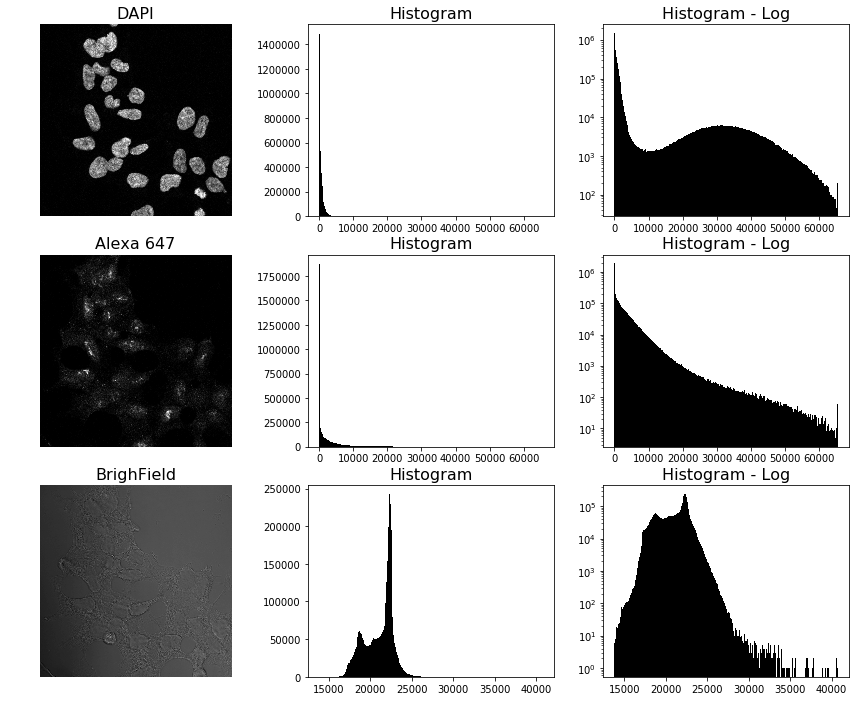

In [47]:
fig, axes = plt.subplots(3,3, figsize=(15,12))
channels = ['DAPI', 'Alexa 647', 'BrighField']
for idx, ax in enumerate(axes):
        ax[0].imshow(stack[...,idx], cmap = 'gray')     
        ax[0].set_title(channels[idx])
        ax[0].axis('off')
        ax[1].hist(stack[...,idx].ravel(), bins=256, fc = 'k')
        ax[1].set_title("Histogram")
        ax[2].hist(stack[...,idx].ravel(), log=True, bins=256, fc = 'k')
        ax[2].set_title("Histogram - Log")

You can pass the argument *clim* to imshow to enhance the contraste:
> you could also use *vmin* and *vmax*

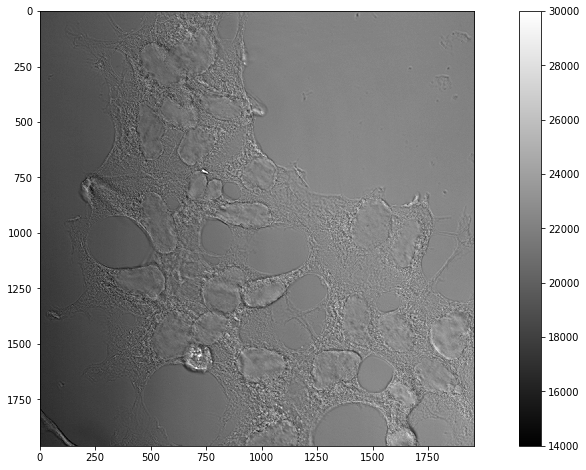

In [32]:
plt.imshow(stack[:,:,2], cmap = 'gray', clim = (14000, 30000))
plt.colorbar()

### Making a composite image

We will use the to_rgb() fucntion form the display library to create a composite image. 
> If auto is False, you can adjust the color manually for every channel.

In [19]:
img_rgb = to_rgb(stack, auto = True, bf=True)

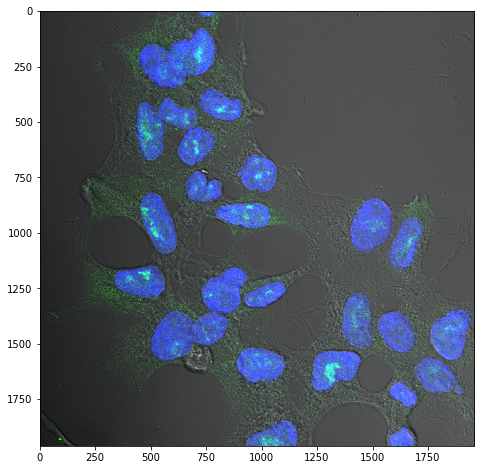

In [20]:
plt.imshow(img_rgb)